In [1]:
import numpy as np
import pandas as pd
dtypes = {'time': 'str'}
parse_dates = ['time']
df = pd.read_csv('results.csv', index_col=0, dtype=dtypes, parse_dates=parse_dates)
#df = df.iloc[0:38, :]

In [2]:
df['delta'] = (df['time']-df['time'].shift())
df = df.drop(0)

In [3]:
df_timestep = df[df.substep.eq(2)]

In [4]:
df_timestep['delta'] = (df_timestep['time']-df_timestep['time'].shift())
df_timestep = df_timestep.drop(2)

<ipython-input-4-bf942d2f30a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timestep['delta'] = (df_timestep['time']-df_timestep['time'].shift())


In [5]:
df_delta_timestep = pd.DataFrame()
df_delta_timestep['delta'] = df_timestep['delta']
df_delta_timestep = df_delta_timestep.astype(np.int64) 

In [6]:
df_delta = pd.DataFrame()
#df_delta['substep'] = df['substep']
df_delta['delta'] = df['delta']
df_delta = df_delta.astype(np.int64) 

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,7
#df_delta.plot.bar(rot=0)

In [8]:
df_delta_timestep = df_delta_timestep.reset_index()
df_delta_timestep = df_delta_timestep.drop(columns=['index'])
#df_delta_timestep.plot.bar(rot=0)

<AxesSubplot:xlabel='substep'>

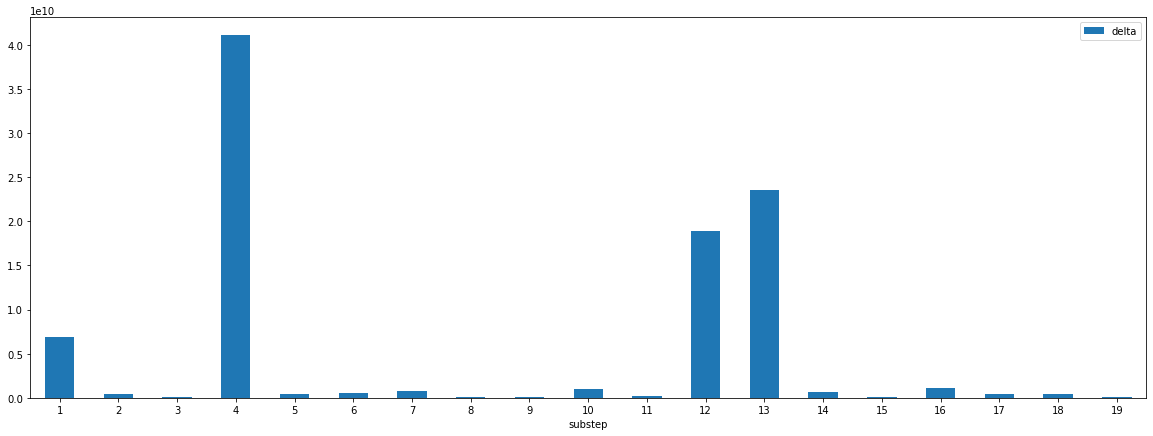

In [9]:
df_delta['substep'] = df['substep']
df_substeps = df_delta.groupby(['substep']).sum()
df_substeps.plot.bar(rot=0)

In [10]:
df_substeps

,delta
substep,
1,6937789000
2,388673000
3,45927000
4,41043216000
5,453479000
6,494240000
7,802973000
8,81184000
9,42270000
